## Visualization of the vectorisation

In [3]:
from config import dataloader_config
from Dataloaders.MRI_loader import get_data_dicts
from Dataloaders.MRI_loader import load
import matplotlib.pyplot as plt
import numpy as np
from process.utils import *

partition=get_data_dicts(dataloader_config['rootdir'],dataloader_config['valid_ratio'])
fixed_image,moving_image,fixed_mask,moving_mask=load(partition['train'][0],partition['train'][1],vectorize=False)

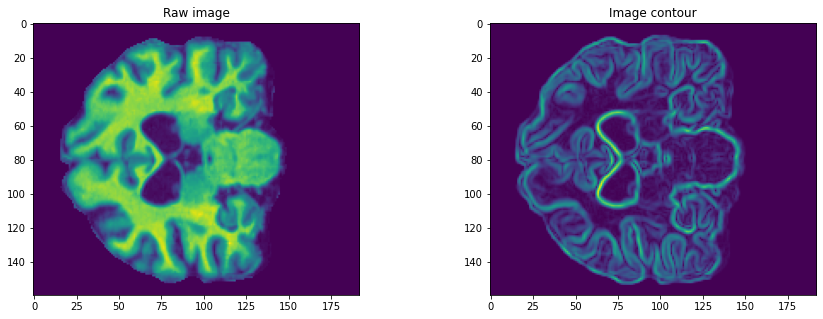

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title("Raw image")
plt.imshow(fixed_image[:,:,100])
plt.subplot(122)
plt.title("Image contour")
plt.imshow(image_contour(fixed_image)[:,:,100])

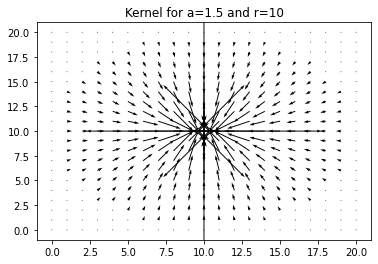

In [31]:
plt.title("Kernel for a=1.5 and r=10")
K = VFK(a=1.5,r=10)
nkx,nky,nkZ, _ = K.shape
xv ,yv = np.meshgrid(range(nkx),range(nky))
plt.quiver(xv, yv, K[:,:,10,0], K[:,:,10,1])

### Influence of parameter a

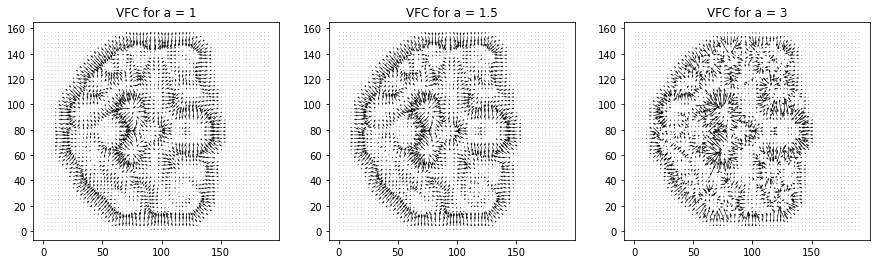

In [32]:
plt.figure(figsize=(15,4))
sc = 3
nx,ny,nz = fixed_image.shape
xv ,yv = np.meshgrid(range(ny),range(nx))
a = [1, 1.5, 3]
for i in range(3):
    vector_field = to_vector(fixed_image,r=10,a=a[i])
    plt.subplot(131+i)
    plt.title("VFC for a = "+str(a[i]))
    plt.quiver(xv[1:nx:sc,1:ny:sc],yv[1:nx:sc,1:ny:sc],vector_field[:,:,100,0][1:nx:sc,1:ny:sc],vector_field[:,:,100,1][1:nx:sc,1:ny:sc])

### Influence of parameter r

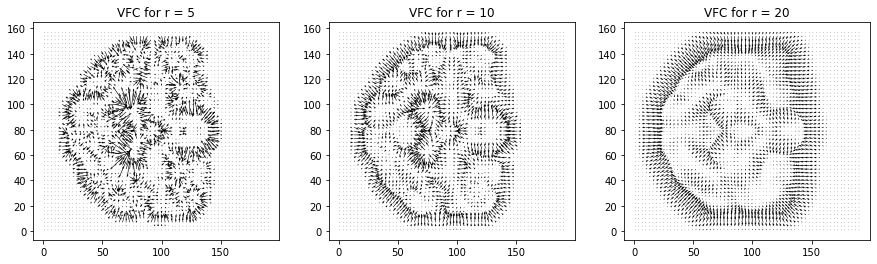

In [19]:
plt.figure(figsize=(15,4))
sc = 3
nx,ny,nz = fixed_image.shape
xv ,yv = np.meshgrid(range(ny),range(nx))
r = [5, 10, 20]
for i in range(3):
    vector_field = to_vector(fixed_image,r=r[i],a=1.5)
    plt.subplot(131+i)
    plt.title("VFC for r = "+str(r[i]))
    plt.quiver(xv[1:nx:sc,1:ny:sc],yv[1:nx:sc,1:ny:sc],vector_field[:,:,100,0][1:nx:sc,1:ny:sc],vector_field[:,:,100,1][1:nx:sc,1:ny:sc])